### Feature Engineering Steps:

- **Step1:** Exploring Features (columns of a dataset) of the dataset.
- **Step2:** Hypothesis Testing.
- **Step3:** Checking for Normal Distribution using Transformations.

##### Importing Data and required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import stats 
import warnings
warnings.filterwarnings('ignore')

### Step1: Exploring Features

##### Import the dataset and create Dataframe

In [2]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Step2: Hypothesis Testing

##### 2.1 Checking Correlation

In [3]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


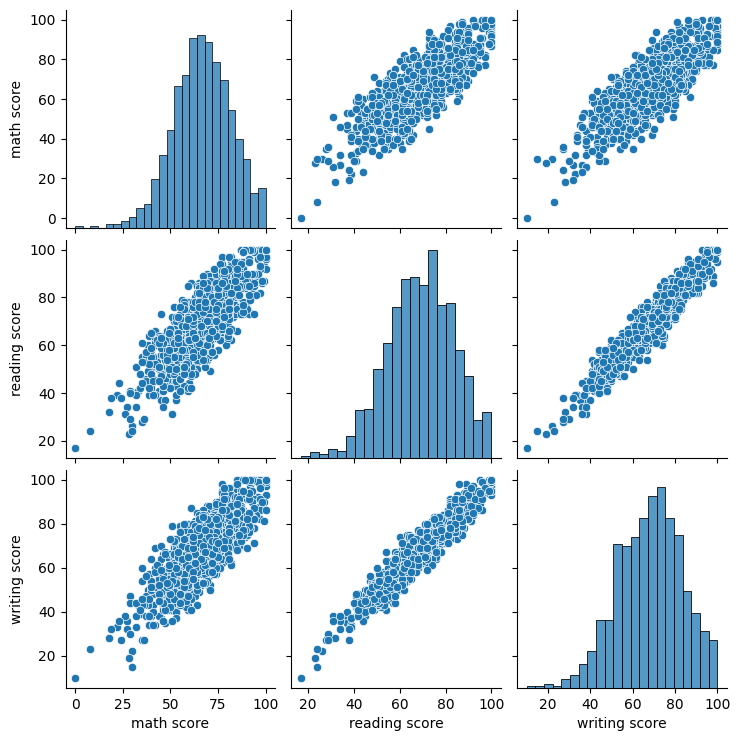

In [4]:
sns.pairplot(df)

##### Observations:

- **All the pairplots seem to have a linear relationship with the other variables. To clarify that we will plot the Correlation map.**

##### 2.2 Shapiro Wick Test

- **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

    - **Ho** : Data is normally distributed

    - **H1** : Data is not normally distributed

In [5]:
# Creating dataframe with only the numerical features

num_features = [col for col in df.columns if df[col].dtype != 'O']
num_df = df[num_features]
num_df.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [6]:
from scipy.stats import shapiro

shapiro_wick_test = []

for column in num_features:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
        
        
result = pd.DataFrame(data=[num_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

,Column Name,Shapiro Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed


##### 2.3 K^2 Normality Test

- **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

    - **Ho** : Data is normally distributed

    - **H1** : Data is not normally distributed

In [7]:
from scipy.stats import normaltest

normaltest_test = []

for column in num_features:
    dataToTest = num_df[column]
    stat,p = normaltest(dataToTest)
    
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
        
        
result = pd.DataFrame(data=[num_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

,Column Name,normaltest Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed


##### 2.4 Spearmanr Test

- **Spearman Rank Correlation**, which is used to measure the correlation between two ranked variables. Whereas The **Pearson correlation coefficient** is computed using raw data values.
- Unlike the **Pearson correlation**, the **Spearman correlation** does not assume that both datasets are normally distributed.
- **Spearman rank correlation** is closely related to the **Pearson correlation**, and both are a bounded value, from `-1 to 1` denoting a correlation between two variables.
    - **Ho** : Independent Samples
    - **H1** : Dependent Samples

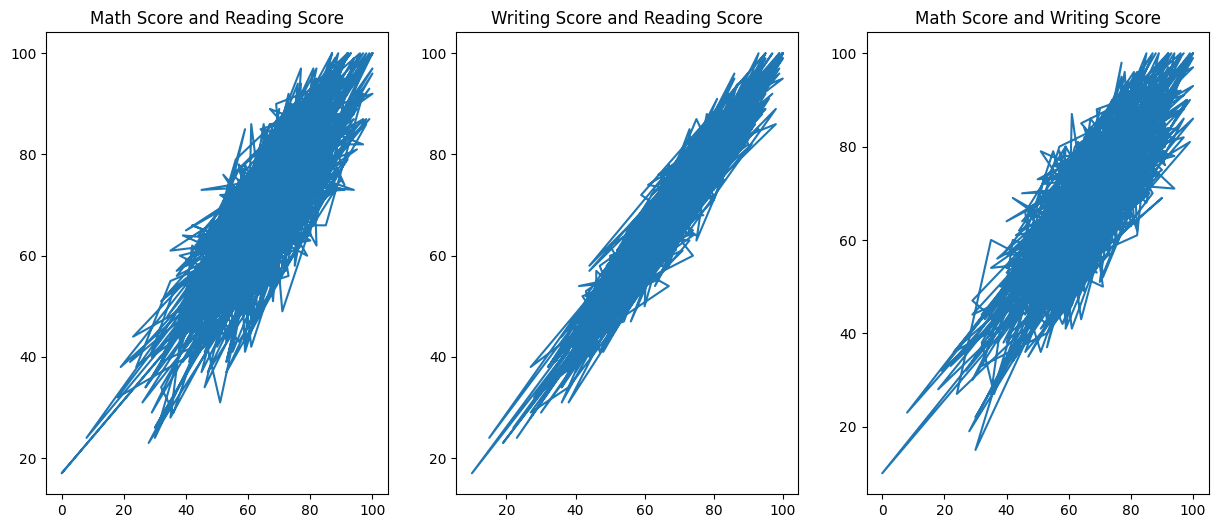

In [8]:
plt.rcParams["figure.figsize"] = (15,6)

plt.subplot(1, 3, 1)
plt.title("Math Score and Reading Score")
plt.plot(num_df['math score'],num_df['reading score'])

plt.subplot(1, 3, 2)
plt.title("Writing Score and Reading Score")
plt.plot(num_df['writing score'],num_df['reading score'])

plt.subplot(1, 3, 3)
plt.title("Math Score and Writing Score")
plt.plot(num_df['math score'],num_df['writing score'])

plt.show()

##### Observations:

- **We can observe linear relationship among two varibales.**

##### Let's prove the Hypothesis using Spearman Rank and Pearson Correlation Tests

In [9]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name, column1, column2):
    column1_to_test = num_df[column1]
    column2_to_test = num_df[column2]
    stat,p = test_name(column1_to_test, column2_to_test)
    
    d =dict()
    d['col1'] = column1
    d['col2'] = column2
    
    if p> 0.05:
        test_results.append("Independent Samples")
    else:
        test_results.append("Dependent Samples")
        
    columns_combination.append(d)

In [10]:
columns_combination = []
test_results = []
test_correlation(spearmanr, 'math score', 'reading score')

In [11]:
test_correlation(spearmanr, 'writing score', 'reading score')

In [12]:
test_correlation(spearmanr, 'math score', 'writing score')

In [13]:
df_spearmanr = pd.DataFrame(columns_combination, test_results)
df_spearmanr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


##### 2.5 pearsonr Test
- **Ho** : Independent Samples
- **H1** : Dependent Samples

In [14]:
columns_combination = []
test_results = []
test_correlation(pearsonr, 'math score', 'reading score')

In [15]:
test_correlation(pearsonr, 'writing score', 'reading score')

In [16]:
test_correlation(pearsonr, 'math score', 'writing score')

In [17]:
df_pearsonr = pd.DataFrame(columns_combination, test_results)
df_pearsonr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


##### Observations:

- **At `5%` level of significance**
- **From above two tests of Pearsonr and Spearmanr ,since all the three p-values are more than `0.05`.**
- **Inference: The scores have a correlation between them.**

In [18]:
# Creating categorical variables dataframe

cat_features = [col for col in df.columns if df[col].dtype == 'O']
cat_df = df[cat_features]
cat_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


##### 2.6 Chi-squared test

- **Tests whether two categorical fetaures are dependent or Not.**
- Here we will test correlation of Categorical columns with Target column i.e average
- Assumptions-
    - All are Independent observation
    - Size of each box of contingency table > 25

In [21]:
from scipy.stats import chi2_contingency

chi2_squared_test = []

for feature in cat_features:
    stat, p , dof, expected = chi2_contingency(pd.crosstab(df['math score'], df[feature]))
    
    if p> 0.05:
        chi2_squared_test.append("Independent Categories")
    else:
        chi2_squared_test.append("Dependent Categories")
        
        
result = pd.DataFrame(data=[cat_features, chi2_squared_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Independent Categories
1,race/ethnicity,Independent Categories
2,parental level of education,Independent Categories
3,lunch,Dependent Categories
4,test preparation course,Independent Categories


##### Observations:

- **The lunch feature is a dependent feature.**

##### 2.7 Levene's Test

- **Equality of variance test**

    - **Ho** : Female and male have equal variance

    - **H1** : Female and male do not have equal variance

In [23]:
import scipy.stats

math_var = scipy.stats.levene(df[df['gender']=='female']['math score'],
                  df[df['gender']=='male']['math score'], center = 'mean')

reading_var = scipy.stats.levene(df[df['gender']=='female']['reading score'],
                  df[df['gender']=='male']['reading score'], center = 'mean')

writing_var = scipy.stats.levene(df[df['gender']=='female']['writing score'],
                  df[df['gender']=='male']['writing score'], center = 'mean')


print("Test Statistic and p-value for math  is", math_var)
print('\n')
print("Test Statistic and p-value for writing is", writing_var)
print('\n')
print("Test Statistic and p-value for reading is", reading_var)

Test Statistic and p-value for math  is LeveneResult(statistic=0.39659058260357727, pvalue=0.5289994390328784)


Test Statistic and p-value for writing is LeveneResult(statistic=0.029036281877215228, pvalue=0.8647298283415281)


Test Statistic and p-value for reading is LeveneResult(statistic=0.016652697287322132, pvalue=0.8973477814233404)


##### Observations:

- **Conclusion : Since, at `5%` level of significance,`P(calculated) > P(0.05)`, so we will accept the H0 (Null Hypothesis).**
- **Inference : All the scores have equal variance with respect to gender.**

##### 2.8 Checking Correlation using Heatmaps

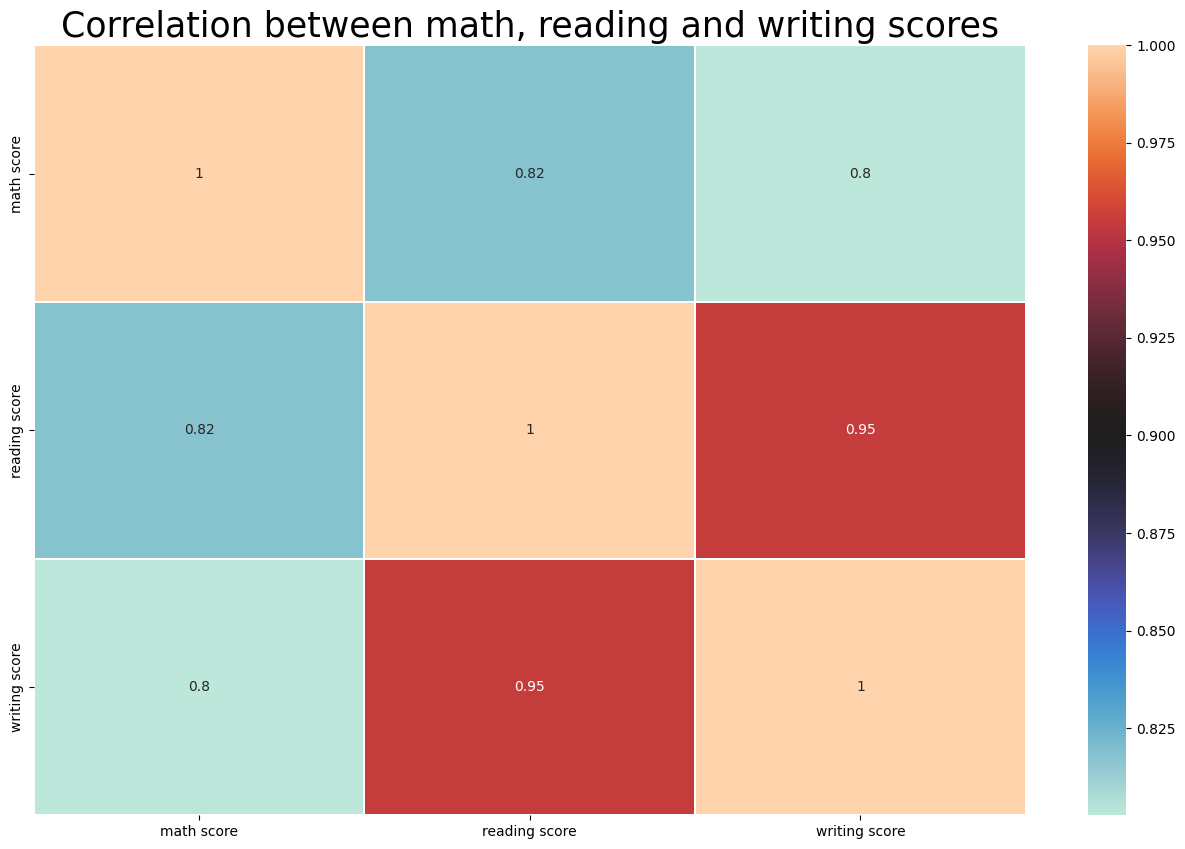

In [24]:
# Relationship analysis
# data.corr()-->correlation matrix

sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.title('Correlation between math, reading and writing scores',color='black',size=25)
plt.show()

##### Observations:

- **Total_score is highly correlated with individual score.**
- **Reading score is also highly correlated with writing score which means students who reads well can also writes well.**
- **Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa.**
- **Total_score and average are highy correlated , hence we can delete one amoung them.**

### Step3: Checking for Normal Distribution using Transformations

##### Q-Q plot (to check if data is normally distributed or not)

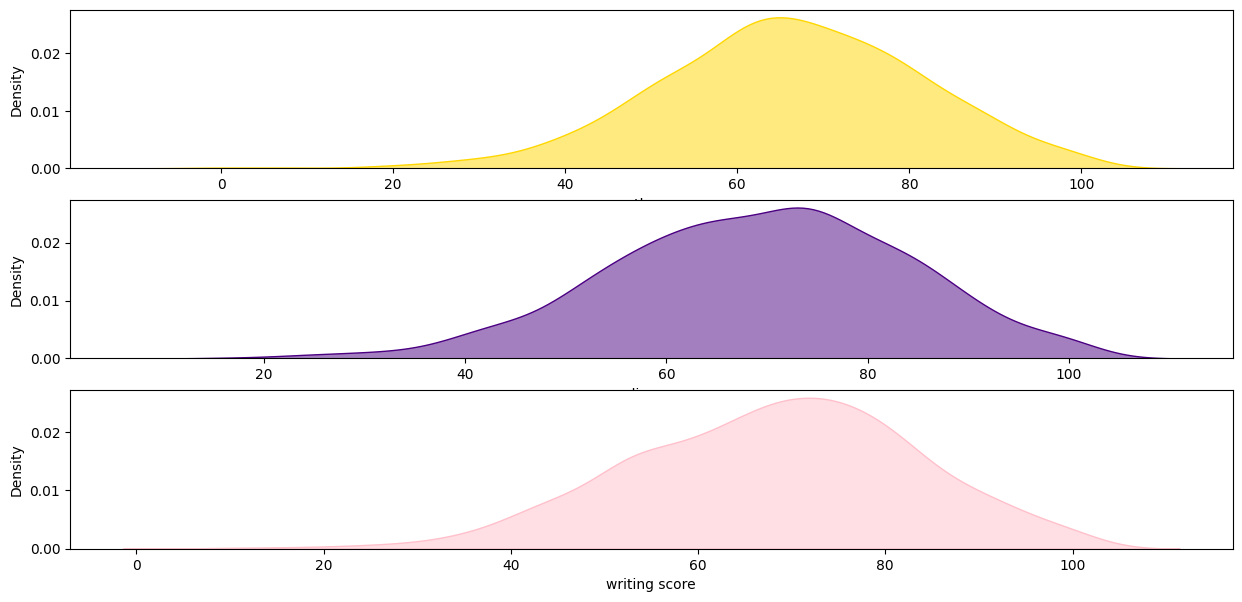

In [25]:
# density plot using seaborn library
fig, axs = plt.subplots(3, 1, figsize=(15, 7))

plt.subplot(3, 1, 1)
sns.kdeplot(df['math score'], shade=True, label='Maths', color='gold', ax=axs[0], alpha=0.5)

plt.subplot(3, 1, 2)
sns.kdeplot(df['reading score'], shade=True, label='Reading', color='indigo', ax=axs[1], alpha=0.5)

plt.subplot(3, 1, 3)
sns.kdeplot(df['writing score'], shade=True, label='Writing', color='pink', ax=axs[2], alpha=0.5)

plt.show()

##### 3.1 Box Cox Transform

- Assumption -
    - The data must be positive

In [28]:
import scipy.stats as stats

def plot_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title("{} PDF".format(column))
    plt.subplot(122)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('{} QQ Plot'.format(column))
    plt.show()

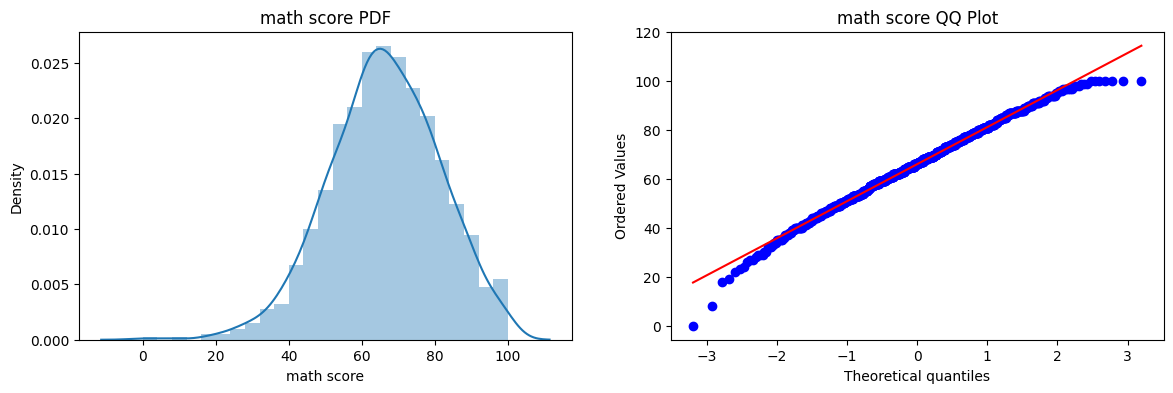

In [29]:
plot_qq_plot('math score')

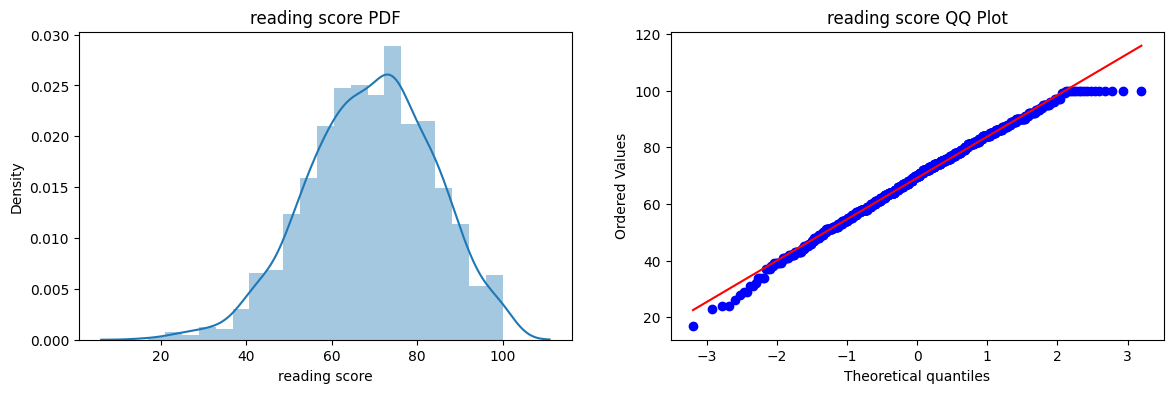

In [30]:
plot_qq_plot('reading score')

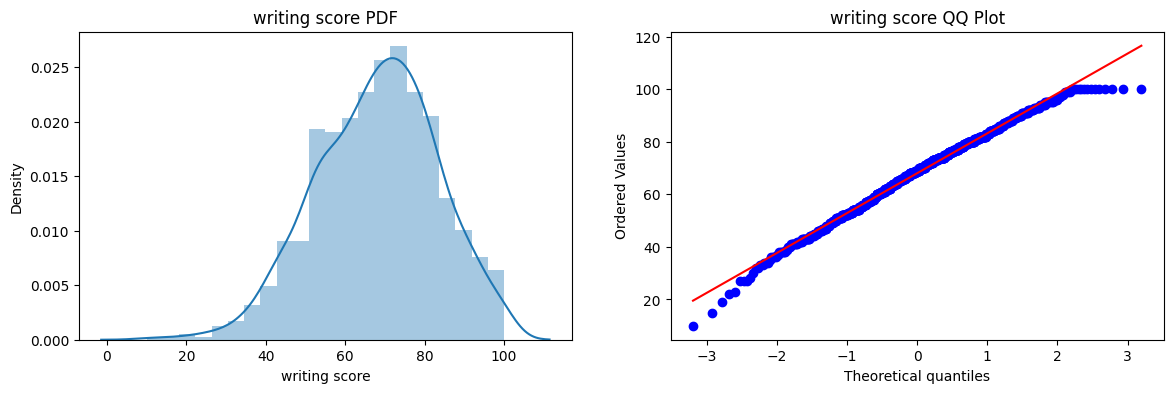

In [31]:
plot_qq_plot('writing score')

##### Observations:

- **For range `-2 to 2` math score follows normal distribution, but for values less than `-`2 and for values greater than `2` it doesn't follow normal distribution.**

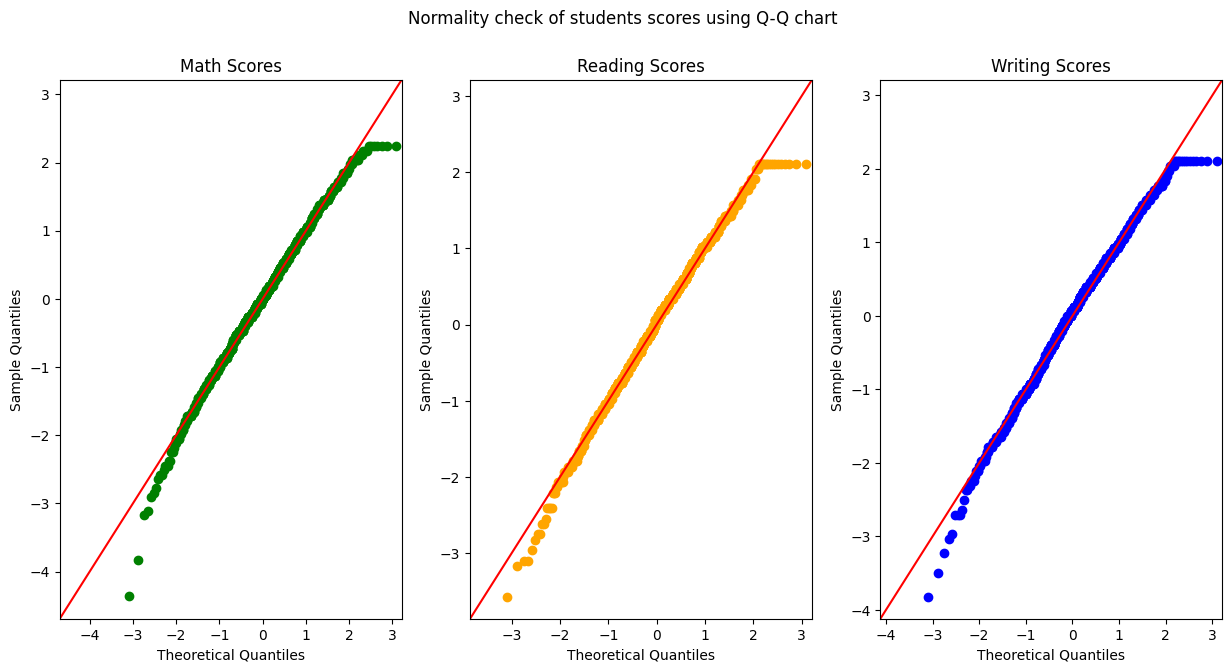

In [32]:
# to build the Q-Q graph
import statsmodels.api as sm 
# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 7)) 


sm.qqplot(df['math score'], markerfacecolor = "green", markeredgecolor = "green", line='45',  fit = True, ax=ax1)
ax1.set_title("Math Scores")

sm.qqplot(df['reading score'], markerfacecolor = "orange", markeredgecolor = "orange", line='45', fit = True, ax=ax2)
ax2.set_title("Reading Scores")

sm.qqplot(df['writing score'], markerfacecolor = "blue", markeredgecolor = "blue", line='45', fit = True, ax=ax3)
ax3.set_title("Writing Scores")

# Set the global title
plt.suptitle("Normality check of students scores using Q-Q chart")

plt.show()

##### Observations:

- **There exists correlation between students scores and the normal distribution line. This means that our data is very close to Gaussian!**